# Case Study

Our client, a real estate tycoon, has reached out to us and wants to predict some real estate sales prices. 

# Dependencies & Data

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

# Data Preprocessing

In [13]:
# Check if the sale price is included in the test set if not included initiate with zero 
if "SalePrice" not in df_test.columns:
    df_test['SalePrice'] = 0

In [14]:
# Concatenate the sets to perform data manipulation and EDA
# Set ID as index for the right output.

df_all = pd.concat([df_train,df_test ], axis = 0)
df_all = df_all.set_index('Id')
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Null Values
Code from stack overflow.
1. if there is at least one nan value present in the line we push that line in the df_null

In [71]:
df_null = df_all[df_all.isnull().sum()[df_all.isnull().sum()>0].index]
df_null.head()

,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,AllPub,VinylSd,VinylSd,196.0,Gd,TA,No,GLQ,...,Gd,Typ,Attchd,2003.0,RFn,2.0,548.0,TA,TA,WD
2,RL,80.0,AllPub,MetalSd,MetalSd,0.0,Gd,TA,Gd,ALQ,...,TA,Typ,Attchd,1976.0,RFn,2.0,460.0,TA,TA,WD
3,RL,68.0,AllPub,VinylSd,VinylSd,162.0,Gd,TA,Mn,GLQ,...,Gd,Typ,Attchd,2001.0,RFn,2.0,608.0,TA,TA,WD
4,RL,60.0,AllPub,Wd Sdng,Wd Shng,0.0,TA,Gd,No,ALQ,...,Gd,Typ,Detchd,1998.0,Unf,3.0,642.0,TA,TA,WD
5,RL,84.0,AllPub,VinylSd,VinylSd,350.0,Gd,TA,Av,GLQ,...,Gd,Typ,Attchd,2000.0,RFn,3.0,836.0,TA,TA,WD


# Calculating the null percentage

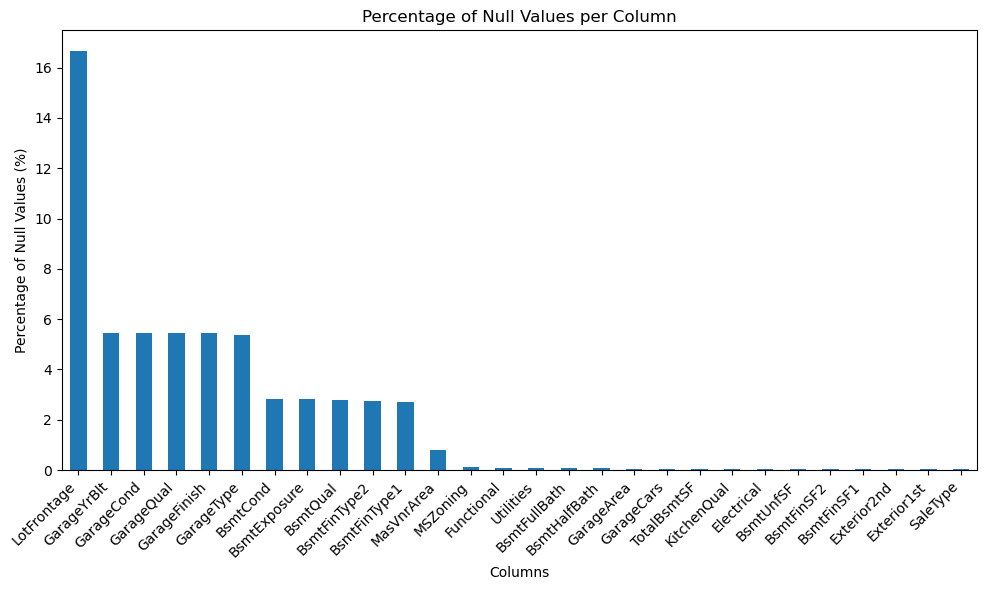

In [77]:
null_percentage = (df_null.isnull().sum() / len(df_null)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_null_percentage.plot(kind='bar')
plt.title("Percentage of Null Values per Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Drop Columns
We will drop all unnecessary columns with categorical values since they are not helpful
Drop all the columns with more than 1100 Nan values 

In [21]:
df_objects = df_all[df_all.select_dtypes(include=['object']).columns]

df_all = df_all.drop(df_all[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [23]:
# we do the same thing to the secondary data frame


In [24]:
df_objects = df_objects.fillna("null")

In [25]:
# Hot encoding to the dataset to fit into a model 
df_objects_encoded = pd.get_dummies(df_objects)

In [26]:
# drop all the null rows
for col in df_objects_encoded.columns:
    if 'null' in col:
        df_objects_encoded = df_objects_encoded.drop(col, axis=1)
        print(f"Dropped column: {col}")

Dropped column: MSZoning_null
Dropped column: Utilities_null
Dropped column: Exterior1st_null
Dropped column: Exterior2nd_null
Dropped column: BsmtQual_null
Dropped column: BsmtCond_null
Dropped column: BsmtExposure_null
Dropped column: BsmtFinType1_null
Dropped column: BsmtFinType2_null
Dropped column: Electrical_null
Dropped column: KitchenQual_null
Dropped column: Functional_null
Dropped column: GarageType_null
Dropped column: GarageFinish_null
Dropped column: GarageQual_null
Dropped column: GarageCond_null
Dropped column: SaleType_null


In [27]:
# concatenate the df_all with the df_encoded
new_df = pd.concat([df_all, df_objects_encoded], axis = 1)

In [28]:
# I want the columns that are not objects i need numeric data to feed it into the model
new_df = new_df.drop(df_all.select_dtypes(include=['object']), axis = 1)

In [29]:
# check if there is any nan values
new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [30]:
# For all the columns in the mode column i will fillna with their mode 
# For all the colums in the mean column I will fill them with their mean
# Patent to MaizeCobra github

Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0] 

Series([], dtype: int64)

In [31]:
# Splitting data
training_df = new_df[0:len(df_train)]
testing_df = new_df[len(df_test):]

In [32]:
# We have to drop from the test data the salePrice since it is the targets column
testing_df = testing_df.drop(columns='SalePrice')

In [33]:
# Importing the libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
# Split data
X = training_df.drop(columns='SalePrice')
y = training_df['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


In [35]:
# Convert to numpy array before reshaping
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

In [36]:
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

In [37]:
# Model Linear Regression
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

449821171.78459525

In [38]:
# Second model for better prediction results
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

3279.8715147253583

In [39]:
# third model
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

143231287.6616791

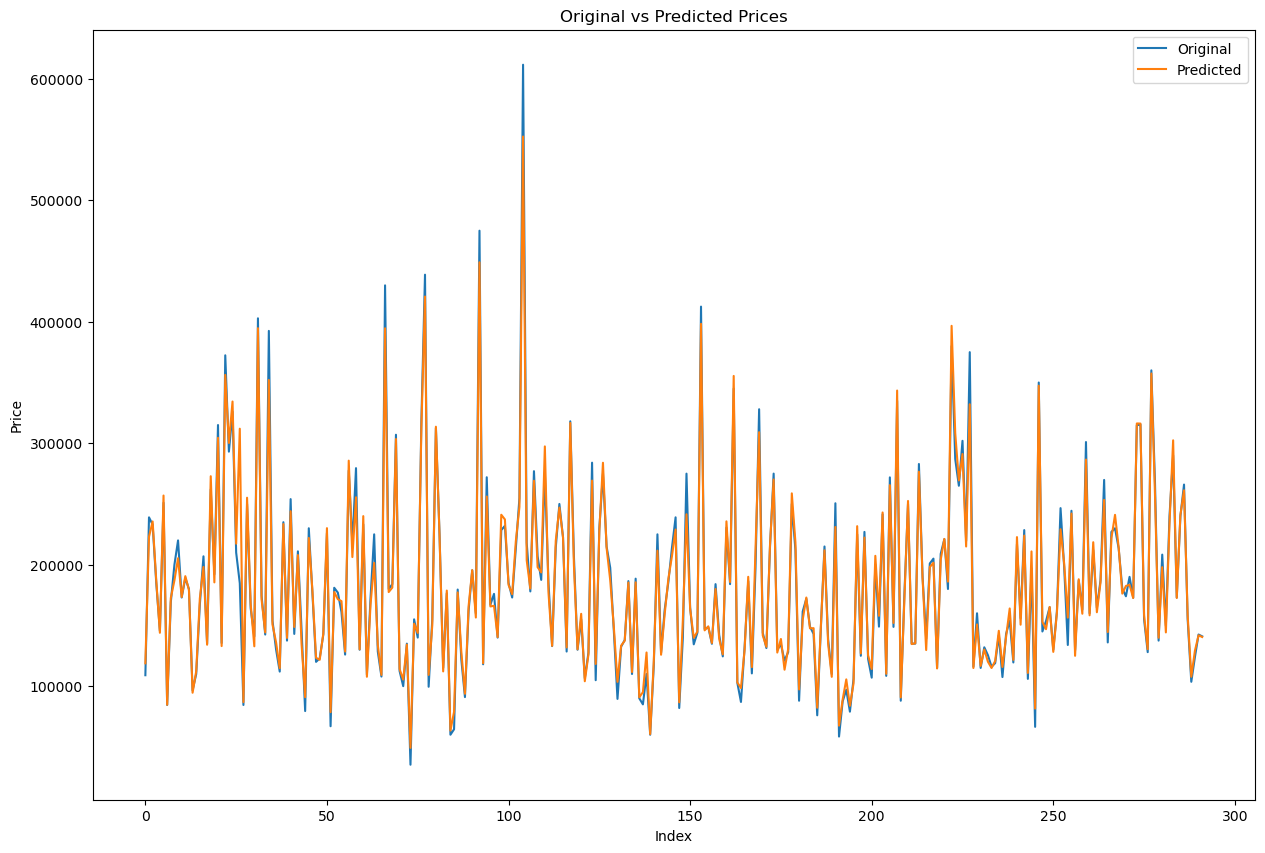

In [40]:
sort_indices = np.argsort(Y_test)

# Plot
plt.figure(figsize=(15, 10))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

In [41]:
pred = model_2.predict(testing_df)

final = pd.DataFrame()
final['Id'] = testing_df.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('output.csv', index=False)